In [ ]:
# First import the client from pypi

In [3]:
import copernicus_marine_client as cmc
from datetime import datetime
import xarray as xr
import cdsapi
import os
import numpy as np

In [ ]:
# Reading data

In [ ]:
cmc.login()

In [ ]:
query_keywords = ["Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed"]
query_result = cmc.describe(contains=query_keywords)
query_result

In [4]:
query_result = cmc.describe(contains=['Global Ocean OSTIA Sea Surface Temperature and Sea Ice Reprocessed'], include_datasets=True)
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        print(f"{dataset.get('dataset_id')} - {dataset.get('dataset_name')}")

ERROR - 2024-10-02T09:25:38Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
ERROR - 2024-10-02T09:25:38Z - Client version 0.10.0 is not compatible with current backend service. Please update to the latest client version.
METOFFICE-GLO-SST-L4-REP-OBS-SST - Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-REP-OBS-SST-V2)


In [5]:
for product in query_result.get('products'):
    for dataset in product.get('datasets'):
        if dataset.get('dataset_id') == "METOFFICE-GLO-SST-L4-REP-OBS-SST":
            chosen_dataset = dataset
chosen_dataset 

{'dataset_id': 'METOFFICE-GLO-SST-L4-REP-OBS-SST',
 'dataset_name': 'Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-REP-OBS-SST-V2)',
 'versions': [{'label': '202003',
   'parts': [{'name': 'default',
     'services': [{'service_type': {'service_name': 'original-files',
        'short_name': 'files'},
       'uri': 'https://s3.waw3-1.cloudferro.com/mdl-native-06/native/SST_GLO_SST_L4_REP_OBSERVATIONS_010_011/METOFFICE-GLO-SST-L4-REP-OBS-SST_202003',
       'variables': [{'short_name': 'analysed_sst',
         'standard_name': 'sea_surface_foundation_temperature',
         'units': 'kelvin',
         'bbox': [-179.97500610351562,
          -89.9749984741211,
          179.97500610351562,
          89.9749984741211],
         'coordinates': [{'coordinates_id': 'time',
           'units': '',
           'minimum_value': '1981-10-01T00:00:00Z',
           'maximum_value': '2022-05-31T00:00:00Z',
           'step': 'P1D',
           'values': None},
          

In [6]:
start_datetime=datetime(2018,1,1)
end_datetime=datetime(2018,12,31)
test_data=cmc.load_xarray_dataset(
    dataset_id="METOFFICE-GLO-SST-L4-REP-OBS-SST", 
    variables=["analysed_sst"],
    minimal_longitude=-170,
    maximal_longitude=170,
    minimal_latitude=-80,
    maximal_latitude=80,
    minimal_depth=0.0,
    maximal_depth=2.0,
    start_datetime=start_datetime,
    end_datetime=end_datetime,
)

WARNING - 2024-10-02T09:25:53Z - 'load_xarray_dataset' has been deprecated, use 'open_dataset' instead
WARNING - 2024-10-02T09:25:53Z - 'minimal_longitude' has been deprecated, use 'minimum_longitude' instead
WARNING - 2024-10-02T09:25:53Z - 'maximal_longitude' has been deprecated, use 'maximum_longitude' instead
WARNING - 2024-10-02T09:25:53Z - 'minimal_latitude' has been deprecated, use 'minimum_latitude' instead
WARNING - 2024-10-02T09:25:53Z - 'maximal_latitude' has been deprecated, use 'maximum_latitude' instead
WARNING - 2024-10-02T09:25:53Z - 'minimal_depth' has been deprecated, use 'minimum_depth' instead
WARNING - 2024-10-02T09:25:53Z - 'maximal_depth' has been deprecated, use 'maximum_depth' instead


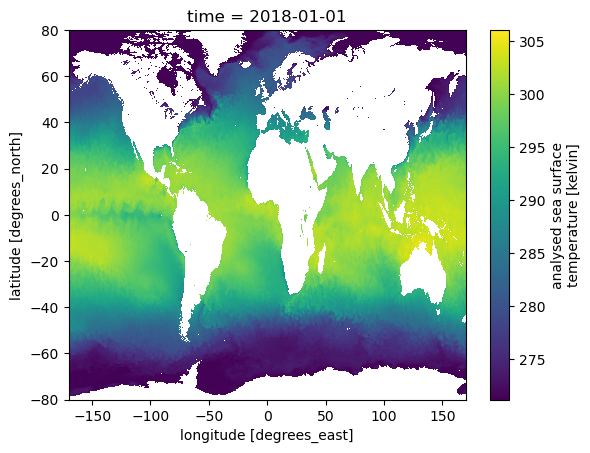

In [7]:
test_data.analysed_sst.isel(time=0).plot()

In [12]:
# Selecting area

In [31]:
domain=[[20,40,-140,-105],[25,43,-82,-50],[25,45,130,160],[-50,-30,15,50]] # [Lat0,Lat1,Lon0,Lon1]
region=("California Current","Gulf Stream","Kuroshio Current","Agulhas Current")

In [22]:
lat0=25
lat1=45
lon0=-82
lon1=-55

lat=test_data.latitude.isel()
lon=test_data.longitude.isel()

poslat=np.where((lat>=lat0) & (lat<=lat1))
poslon=np.where((lon>=lon0) & (lon<=lon1))

In [27]:
sst=test_data['analysed_sst'][:,poslat[0],poslon[0]]-273.15

In [ ]:
# Estimation mean, std

In [30]:
meanvar=np.nanmean(sst,axis=0)
meanstd=np.nanstd(sst,axis=0)


/tmp/ipykernel_7651/4003943372.py:1: RuntimeWarning: Mean of empty slice
  meanvar=np.nanmean(sst,axis=0)
/opt/conda/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
